In [1]:
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
!ls

arms.py
Bandit_Analysis.ipynb
Bandit_experiment.ipynb
base_analysis.ipynb
cfg.py
eGreedyMAB_BernoulliArm_0.5_Naive_results.pkl
eGreedyMAB_BernoulliArm_1.0_Naive_results.pkl
eGreedyMAB_BernoulliArm_1.0_Optimistic_results.pkl
eGreedyMAB_GaussianArm_0.5_Naive_results.pkl
eGreedyMAB_GaussianArm_1.0_Naive_results.pkl
eGreedyMAB_GaussianArm_1.0_Optimistic_results.pkl
mab.py
main.py
__pycache__


In [3]:
def process(df, is_ucb=True):
    ## get cumulative reward
    cumsum_base = np.array([], dtype='float')
    for e in df['sim'].unique():
        rundf = df[df['sim'] == e]
        run_cumsum = np.cumsum(rundf['reward'])
        cumsum_base = np.append(cumsum_base, run_cumsum)
    df['cumulative_reward'] = cumsum_base
    
    ## check if the optimal arm is selected at each run
    df['chosen_optimal'] = (df['chosen_arm'] == df['optimal_arm']).astype('int')
    
    ## groupby
    if is_ucb:
        result = df[['conf', 'step', 'reward', 'chosen_optimal']].groupby(by=['conf', 'step']).mean(numeric_only=False)
    else:
        result = df[['epsilon', 'step', 'reward', 'chosen_optimal']].groupby(by=['epsilon', 'step']).mean(numeric_only=False)
    result.reset_index(drop=False, inplace=True)
    
    return result

In [4]:
def plot_results(dfs, column, title, figsize=(12, 8), is_ucb=True):
    split = column.split('_')
    split[0] = split[0][0].upper() + split[0][1:]
    ylabel = ' '.join(split)
    
    plt.figure(figsize=figsize)
    for item in dfs:
        if is_ucb:
            plt.plot(item[column], label=f"conf={item['conf'].iloc[0]}")
        else:
            plt.plot(item[column], label=f"eps={item['epsilon'].iloc[0]}")
    plt.grid(True)
    plt.xlabel("Step")
    plt.ylabel(ylabel)
    plt.legend()
    plt.title(title)
    plt.show()

# Naive approach

## alpha = 1

In [5]:
with open("./eGreedyMAB_BernoulliArm_1.0_Naive_results.pkl", 'rb') as f:
    bernoulli = pickle.load(f)
    
with open("./eGreedyMAB_GaussianArm_1.0_Naive_results.pkl", 'rb') as f:
    gaussian = pickle.load(f)

In [6]:
bern_results_naive_1 = []
for df in tqdm(bernoulli):
    bern_results_naive_1.append(process(df, False))
    
gaus_results_naive_1 = []
for df in tqdm(gaussian):
    gaus_results_naive_1.append(process(df, False))

100%|██████████| 6/6 [00:46<00:00,  7.75s/it]


### Optimal Action %

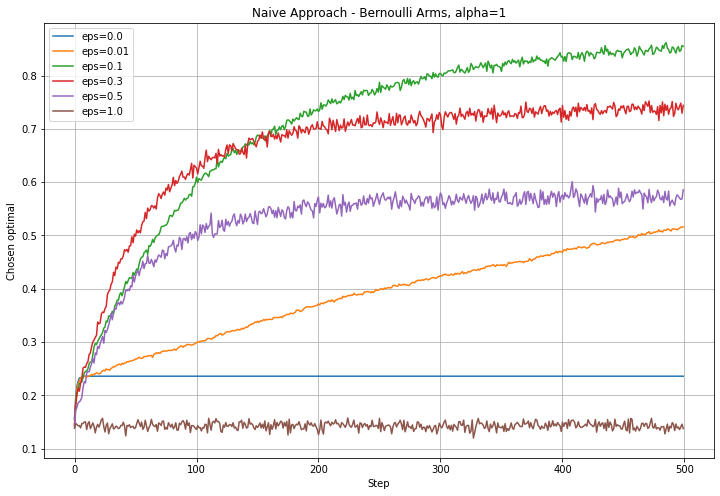

In [7]:
plot_results(bern_results_naive_1, column='chosen_optimal', 
             title="Naive Approach - Bernoulli Arms, alpha=1", is_ucb=False)

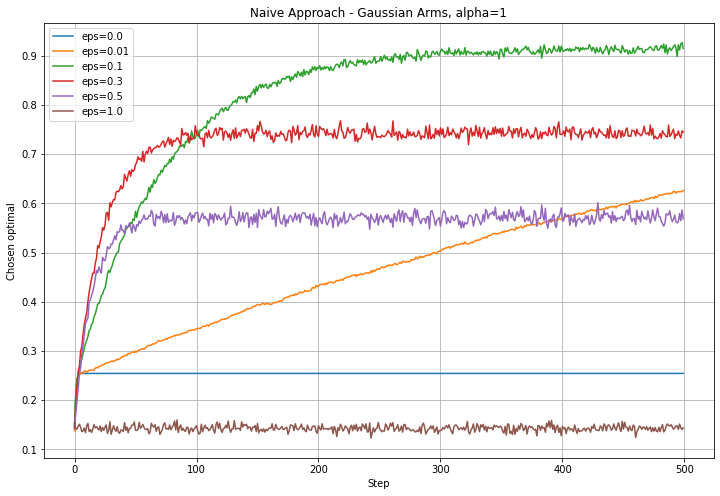

In [8]:
plot_results(gaus_results_naive_1, column='chosen_optimal', 
             title="Naive Approach - Gaussian Arms, alpha=1", is_ucb=False)

### Average Reward

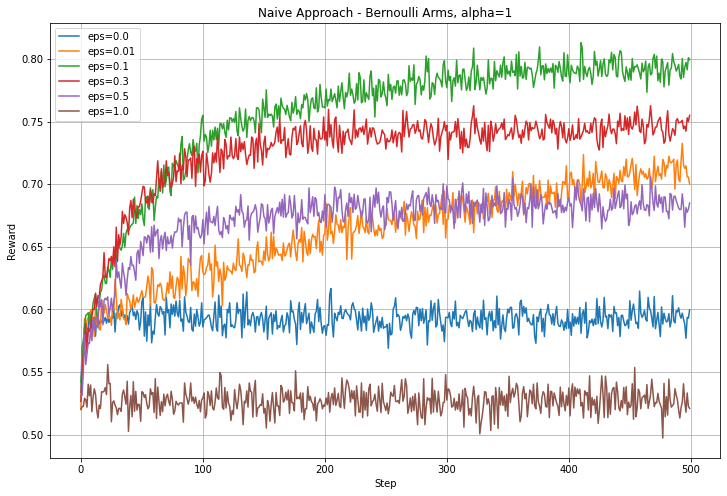

In [9]:
plot_results(bern_results_naive_1, column='reward', 
             title="Naive Approach - Bernoulli Arms, alpha=1", is_ucb=False)

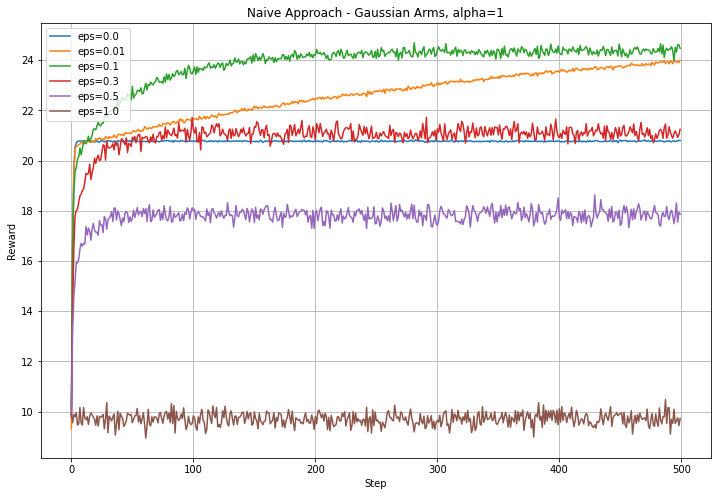

In [10]:
plot_results(gaus_results_naive_1, column='reward', 
             title="Naive Approach - Gaussian Arms, alpha=1", is_ucb=False)

## alpha=0.5

In [11]:
with open("./eGreedyMAB_BernoulliArm_0.5_Naive_results.pkl", 'rb') as f:
    bernoulli_naive_half = pickle.load(f)
    
with open("./eGreedyMAB_GaussianArm_0.5_Naive_results.pkl", 'rb') as f:
    gaussian_naive_half = pickle.load(f)

In [12]:
bern_results_naive_half = []
for df in tqdm(bernoulli_naive_half):
    bern_results_naive_half.append(process(df, False))
    
gaus_results_naive_half = []
for df in tqdm(gaussian_naive_half):
    gaus_results_naive_half.append(process(df, False))

100%|██████████| 6/6 [00:46<00:00,  7.73s/it]


### Optimal action %

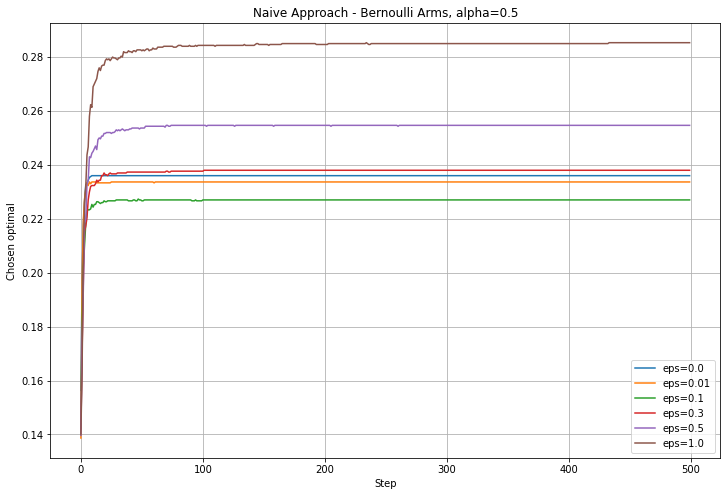

In [13]:
plot_results(bern_results_naive_half, column='chosen_optimal', 
             title="Naive Approach - Bernoulli Arms, alpha=0.5", is_ucb=False)

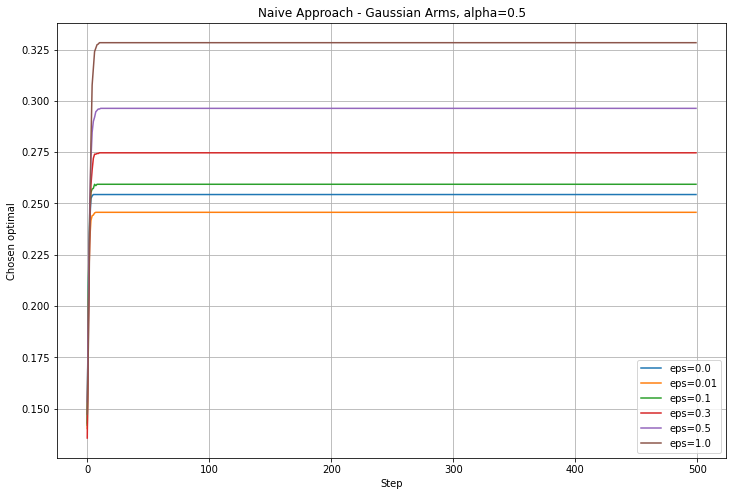

In [14]:
plot_results(gaus_results_naive_half, column='chosen_optimal', 
             title="Naive Approach - Gaussian Arms, alpha=0.5", is_ucb=False)

### Average Reward

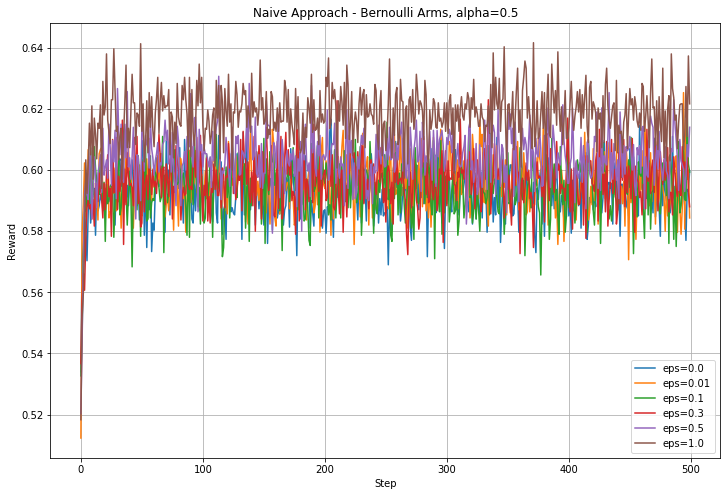

In [15]:
plot_results(bern_results_naive_half, column='reward', 
             title="Naive Approach - Bernoulli Arms, alpha=0.5", is_ucb=False)

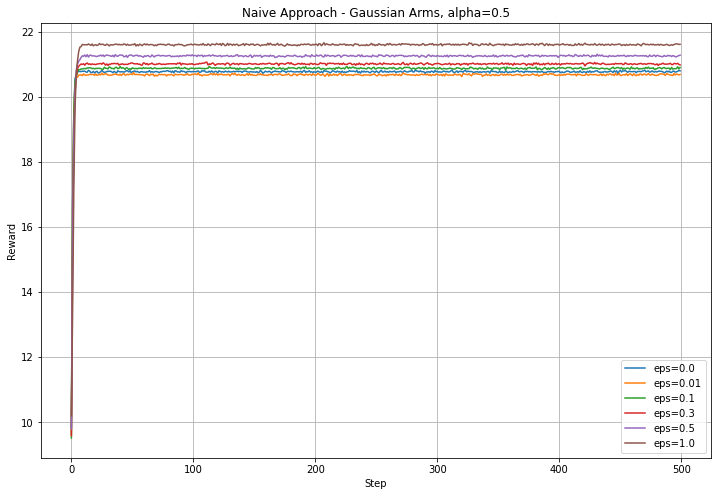

In [16]:
plot_results(gaus_results_naive_half, column='reward', 
             title="Naive Approach - Gaussian Arms, alpha=0.5", is_ucb=False)

# Optimistic Approach

## alpha=1

In [17]:
with open("./eGreedyMAB_BernoulliArm_1.0_Optimistic_results.pkl", 'rb') as f:
    bernoulli_opt_1 = pickle.load(f)
    
with open("./eGreedyMAB_GaussianArm_1.0_Optimistic_results.pkl", 'rb') as f:
    gaussian_opt_1 = pickle.load(f)

In [18]:
bern_results_opt_1 = []
for df in tqdm(bernoulli_opt_1):
    bern_results_opt_1.append(process(df, False))
    
gaus_results_opt_1 = []
for df in tqdm(gaussian_opt_1):
    gaus_results_opt_1.append(process(df, False))

100%|██████████| 6/6 [00:50<00:00,  8.47s/it]


In [19]:
print(f"Bernoulli\n")
print("Greedy")
display(bern_results_opt_1[0].head())
print()
display(bern_results_opt_1[0].tail())
print()

print("egreedy")
display(bern_results_opt_1[1].head())
print()
display(bern_results_opt_1[1].tail())

Bernoulli

Greedy


,epsilon,step,reward,chosen_optimal
0,0.0,0,0.528000,0.148333
1,0.0,1,0.526000,0.133667
2,0.0,2,0.536333,0.144667
3,0.0,3,0.526333,0.144333
4,0.0,4,0.534667,0.143333


,epsilon,step,reward,chosen_optimal
495,0.0,495,0.775000,0.724667
496,0.0,496,0.784333,0.724667
497,0.0,497,0.780667,0.724667
498,0.0,498,0.780333,0.724667
499,0.0,499,0.774000,0.724667



egreedy


,epsilon,step,reward,chosen_optimal
0,0.01,0,0.525000,0.145667
1,0.01,1,0.535000,0.138000
2,0.01,2,0.542333,0.152000
3,0.01,3,0.525667,0.148000
4,0.01,4,0.512000,0.129333


,epsilon,step,reward,chosen_optimal
495,0.01,495,0.781000,0.756000
496,0.01,496,0.785333,0.752667
497,0.01,497,0.778667,0.754333
498,0.01,498,0.789000,0.757000
499,0.01,499,0.771667,0.754667


### Optimal action %

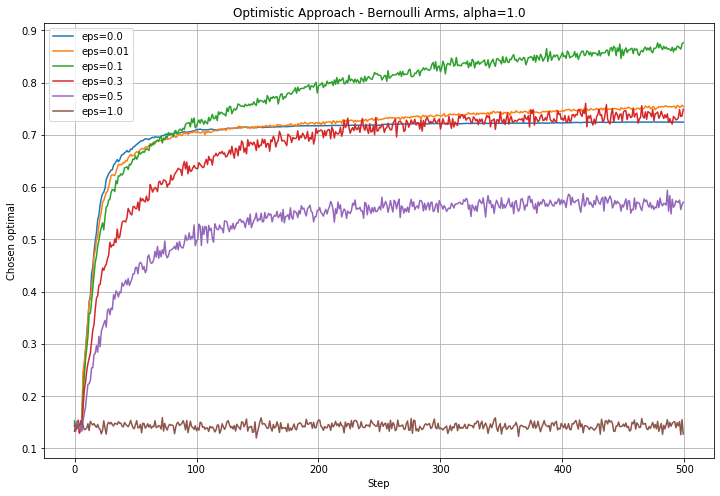

In [20]:
plot_results(bern_results_opt_1, column='chosen_optimal', 
             title="Optimistic Approach - Bernoulli Arms, alpha=1.0", is_ucb=False)

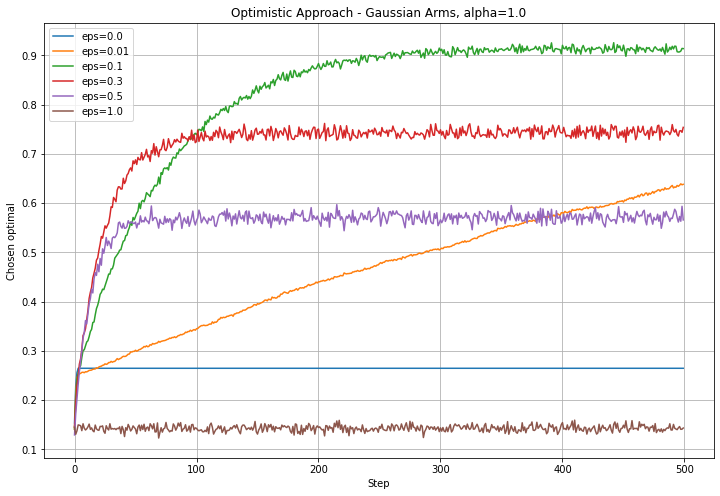

In [21]:
plot_results(gaus_results_opt_1, column='chosen_optimal', 
             title="Optimistic Approach - Gaussian Arms, alpha=1.0", is_ucb=False)

### Average Reward

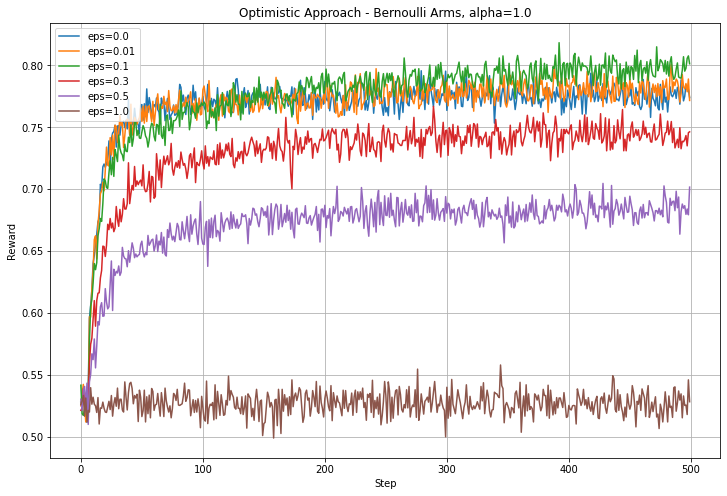

In [22]:
plot_results(bern_results_opt_1, column='reward', 
             title="Optimistic Approach - Bernoulli Arms, alpha=1.0", is_ucb=False)

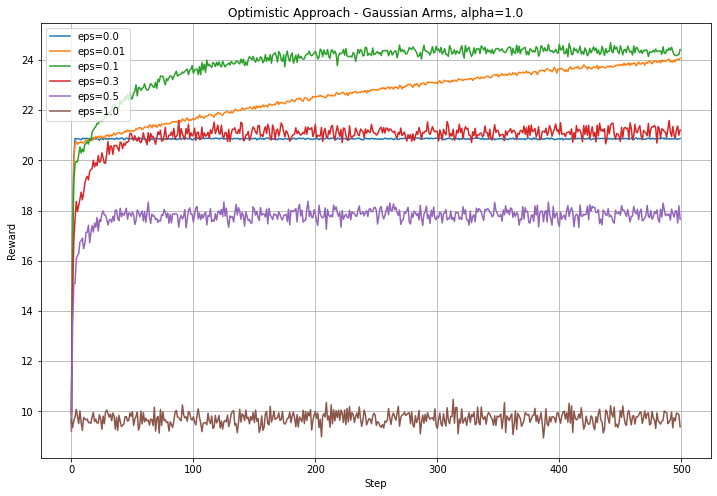

In [23]:
plot_results(gaus_results_opt_1, column='reward', 
             title="Optimistic Approach - Gaussian Arms, alpha=1.0", is_ucb=False)

## alpha=0.5

In [24]:
with open("./eGreedyMAB_BernoulliArm_0.5_Optimistic_results.pkl", 'rb') as f:
    bernoulli_opt_half = pickle.load(f)
    
with open("./eGreedyMAB_GaussianArm_0.5_Optimistic_results.pkl", 'rb') as f:
    gaussian_opt_half = pickle.load(f)

In [25]:
bern_results_opt_half = []
for df in tqdm(bernoulli_opt_half):
    bern_results_opt_half.append(process(df, False))
    
gaus_results_opt_half = []
for df in tqdm(gaussian_opt_half):
    gaus_results_opt_half.append(process(df, False))

100%|██████████| 6/6 [00:43<00:00,  7.22s/it]


### Optimal action %

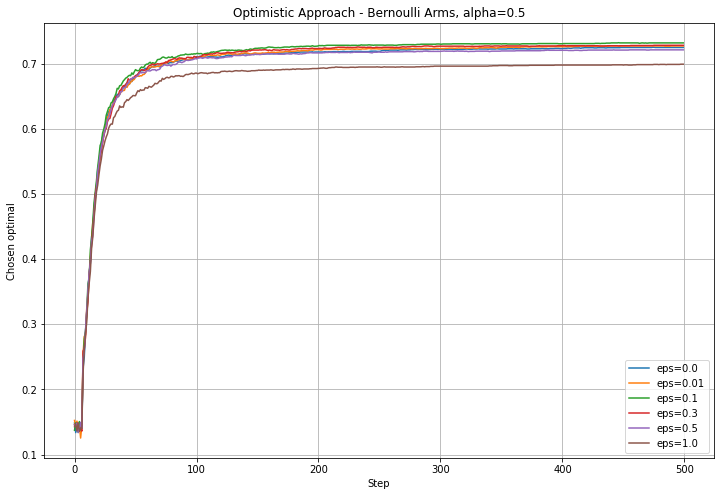

In [26]:
plot_results(bern_results_opt_half, column='chosen_optimal', 
             title="Optimistic Approach - Bernoulli Arms, alpha=0.5", is_ucb=False)

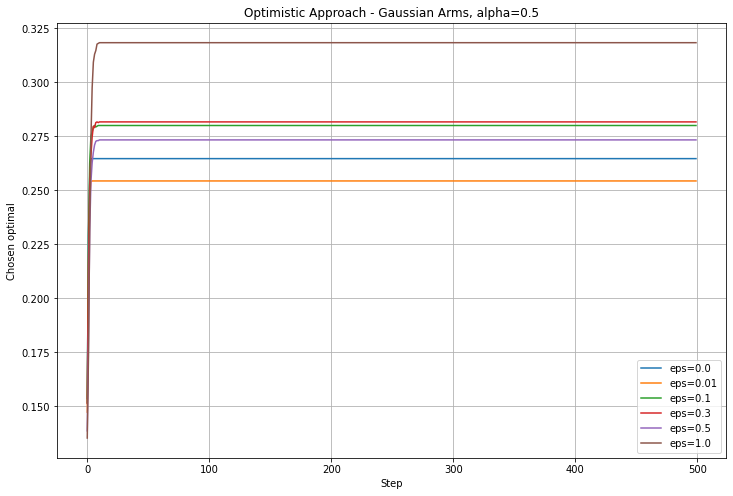

In [27]:
plot_results(gaus_results_opt_half, column='chosen_optimal', 
             title="Optimistic Approach - Gaussian Arms, alpha=0.5", is_ucb=False)

### Average Reward

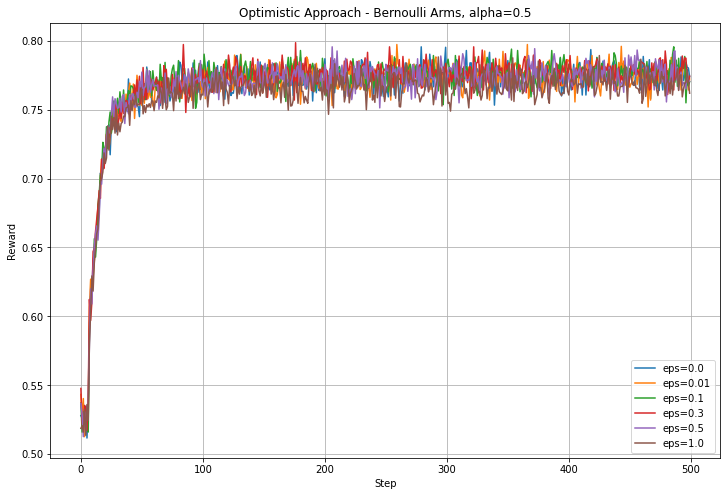

In [28]:
plot_results(bern_results_opt_half, column='reward', 
             title="Optimistic Approach - Bernoulli Arms, alpha=0.5", is_ucb=False)

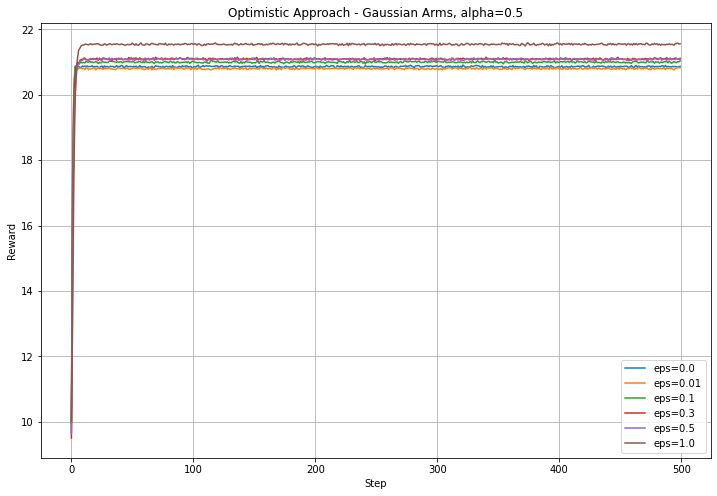

In [29]:
plot_results(gaus_results_opt_half, column='reward', 
             title="Optimistic Approach - Gaussian Arms, alpha=0.5", is_ucb=False)

# Comparison - Naive vs Optimistic

## Bernoulli alpha=1

### Optimal action %

In [30]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in bern_results_naive_1]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_1[naive_argmax]['epsilon'].iloc[0]}")

Naive Approach	 Best epsilon - 0.1


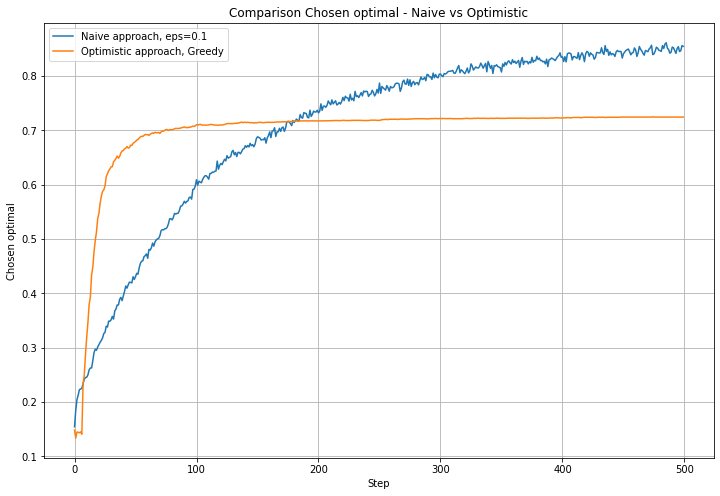

In [31]:
column = 'chosen_optimal'
best_epsilon = bern_results_naive_1[naive_argmax]['epsilon'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_1[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(bern_results_opt_1[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

### Average reward

In [32]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in bern_results_naive_1]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_1[naive_argmax]['epsilon'].iloc[0]}")

Naive Approach	 Best epsilon - 0.1


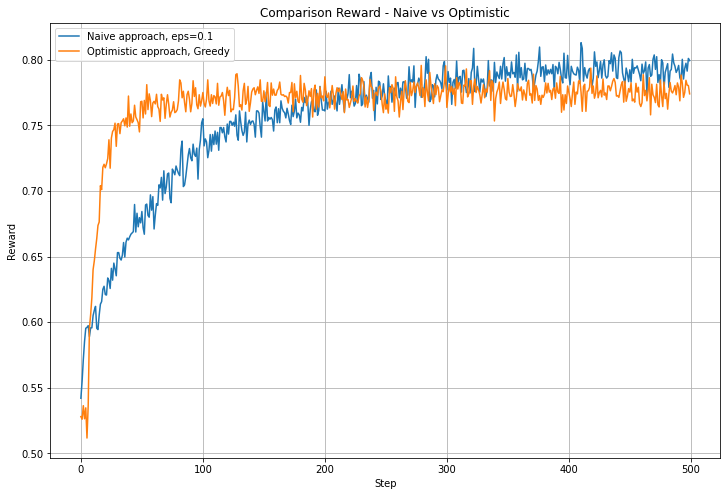

In [33]:
column = 'reward'
best_epsilon = bern_results_naive_1[naive_argmax]['epsilon'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_1[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(bern_results_opt_1[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

## Bernoulli alpha=0.5

### Optimal action %

In [34]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in bern_results_naive_half]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_half[naive_argmax]['epsilon'].iloc[0]}")

Naive Approach	 Best epsilon - 1.0


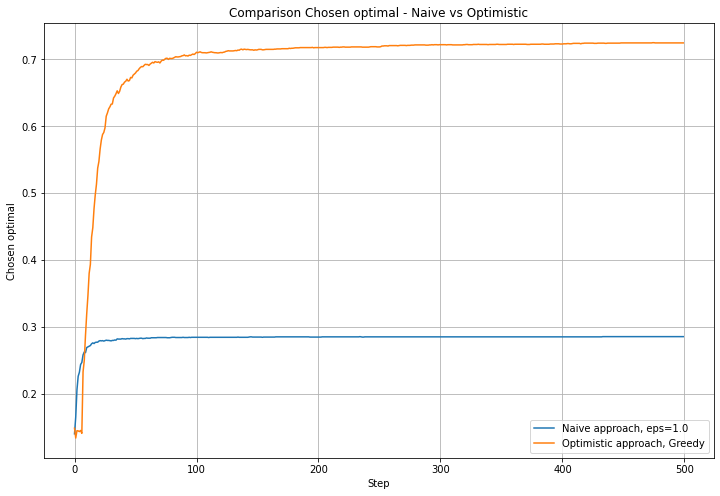

In [35]:
column = 'chosen_optimal'
best_epsilon = bern_results_naive_half[naive_argmax]['epsilon'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_half[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(bern_results_opt_half[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

### Average reward

In [36]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in bern_results_naive_half]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_half[naive_argmax]['epsilon'].iloc[0]}")

Naive Approach	 Best epsilon - 1.0


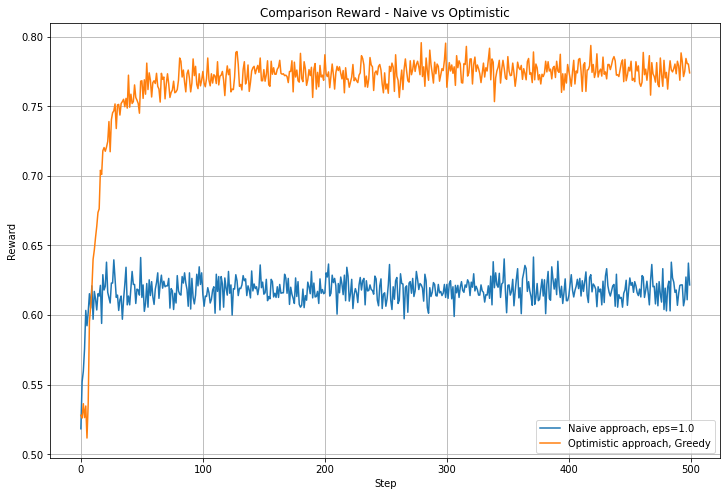

In [37]:
column = 'reward'
best_epsilon = bern_results_naive_half[naive_argmax]['epsilon'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_half[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(bern_results_opt_half[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

## Gaussian alpha=1

### Optimal action %

In [38]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in gaus_results_naive_1]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_1[naive_argmax]['epsilon'].iloc[0]}")

Naive Approach	 Best epsilon - 0.1


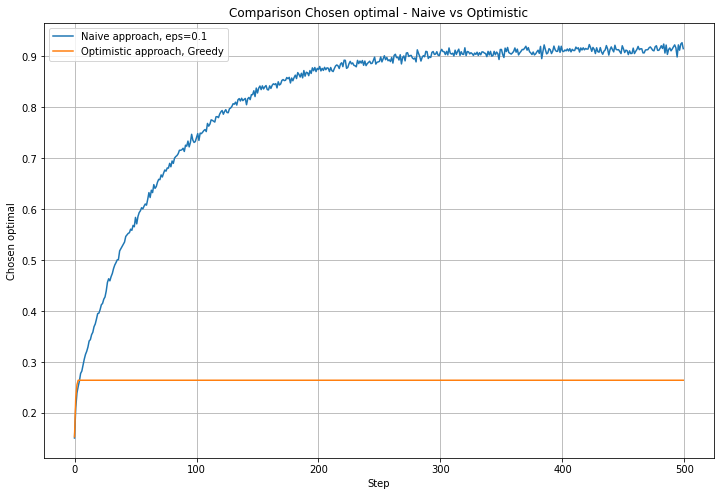

In [39]:
column = 'chosen_optimal'
best_epsilon = gaus_results_naive_1[naive_argmax]['epsilon'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_1[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(gaus_results_opt_1[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

### Average reward

In [40]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in gaus_results_naive_1]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_1[naive_argmax]['epsilon'].iloc[0]}")

Naive Approach	 Best epsilon - 0.1


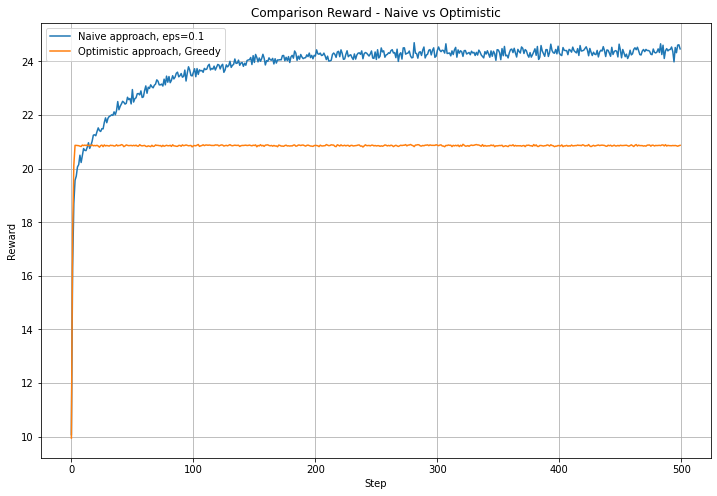

In [41]:
column = 'reward'
best_epsilon = gaus_results_naive_1[naive_argmax]['epsilon'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_1[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(gaus_results_opt_1[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

## Gaussian alpha=0.5

### Optimal action %

In [42]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in gaus_results_naive_half]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_half[naive_argmax]['epsilon'].iloc[0]}")

Naive Approach	 Best epsilon - 1.0


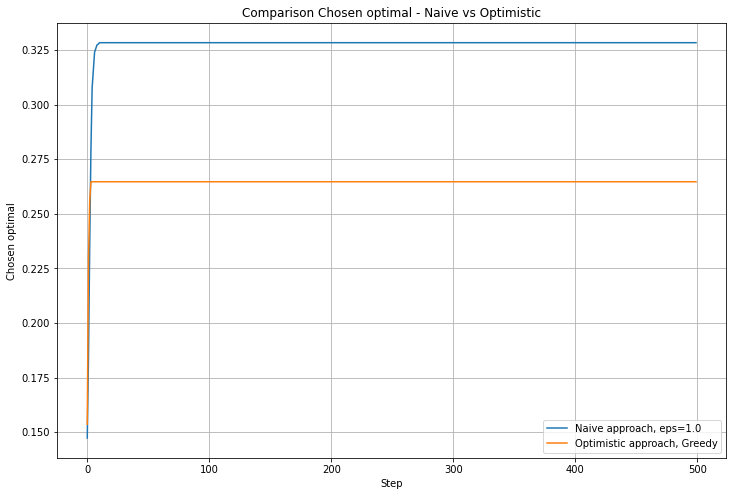

In [43]:
column = 'chosen_optimal'
best_epsilon = gaus_results_naive_half[naive_argmax]['epsilon'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_half[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(gaus_results_opt_half[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

### Average reward

In [44]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in gaus_results_naive_half]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_half[naive_argmax]['epsilon'].iloc[0]}")

Naive Approach	 Best epsilon - 1.0


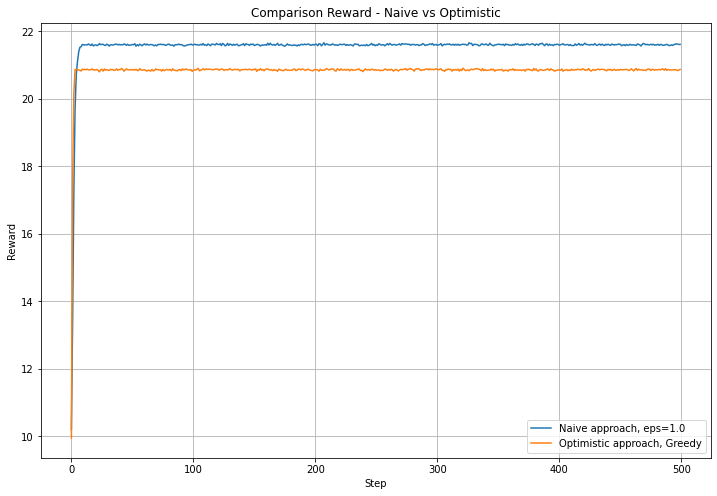

In [45]:
column = 'reward'
best_epsilon = gaus_results_naive_half[naive_argmax]['epsilon'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_half[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(gaus_results_opt_half[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

# UCB

In [46]:
with open("./UCB_BernoulliArm_1.0_Naive_results.pkl", 'rb') as f:
    ucb_bernoulli = pickle.load(f)
    
with open("./UCB_GaussianArm_1.0_Naive_results.pkl", 'rb') as f:
    ucb_gaussian = pickle.load(f)

In [47]:
ucb_bern_results = []
for df in tqdm(ucb_bernoulli):
    ucb_bern_results.append(process(df))
    
ucb_gaus_results = []
for df in tqdm(ucb_gaussian):
    ucb_gaus_results.append(process(df))

100%|██████████| 5/5 [00:38<00:00,  7.72s/it]


### Optimal Action %

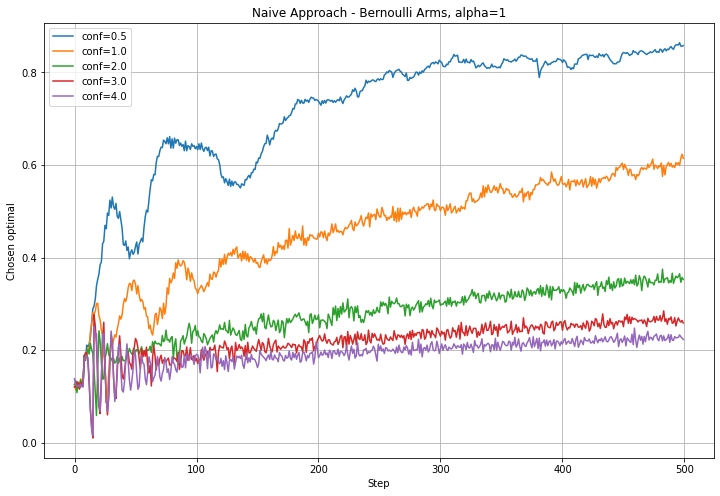

In [48]:
plot_results(ucb_bern_results, column='chosen_optimal', title="Naive Approach - Bernoulli Arms, alpha=1")

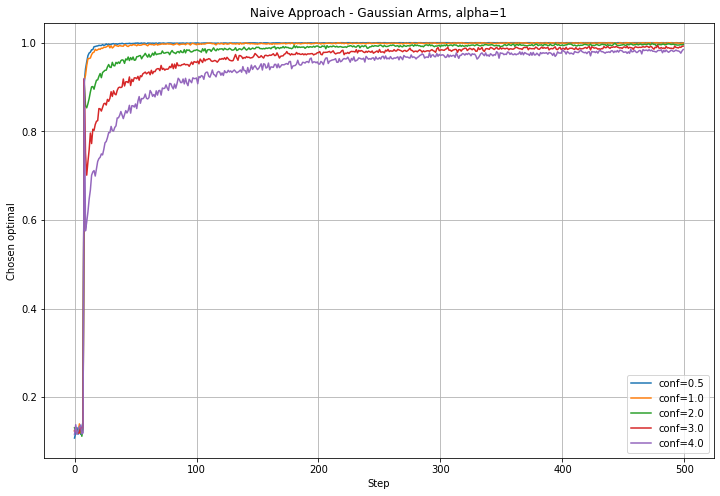

In [49]:
plot_results(ucb_gaus_results, column='chosen_optimal', title="Naive Approach - Gaussian Arms, alpha=1")

### Average Reward

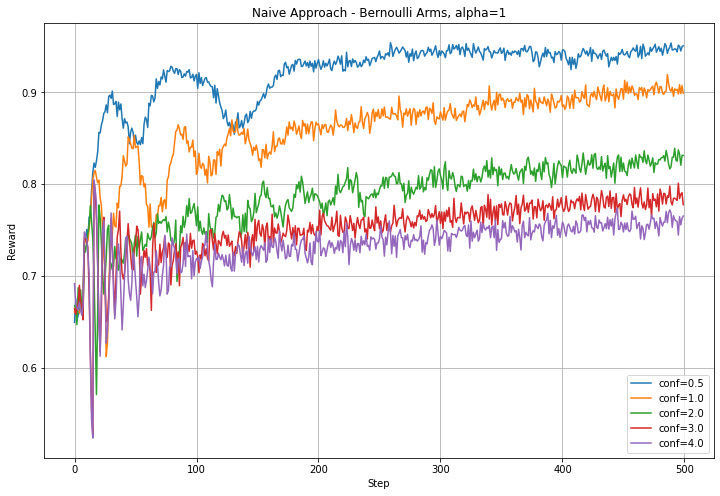

In [50]:
plot_results(ucb_bern_results, column='reward', title="Naive Approach - Bernoulli Arms, alpha=1")

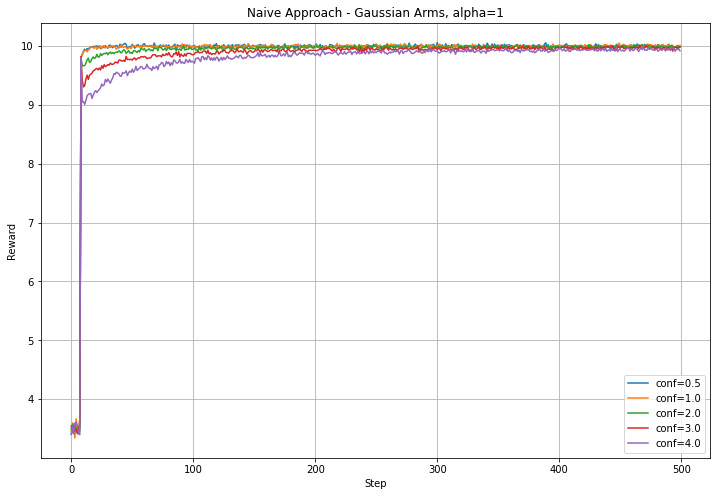

In [51]:
plot_results(ucb_gaus_results, column='reward', title="Naive Approach - Gaussian Arms, alpha=1")

# UCB vs MAB

## UCB vs Naive - Bernoulli

### Optimal action %

In [52]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in bern_results_naive_1]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_1[naive_argmax]['epsilon'].iloc[0]}")

Naive Approach	 Best epsilon - 0.1


In [53]:
## find the best conf
ucb_mean_choices = [item['chosen_optimal'].mean() for item in ucb_bern_results]
ucb_bern_argmax = np.argmax(ucb_mean_choices)

print(f"UCB\t Best conf - {ucb_bern_results[ucb_bern_argmax]['conf'].iloc[0]}")

UCB	 Best conf - 0.5


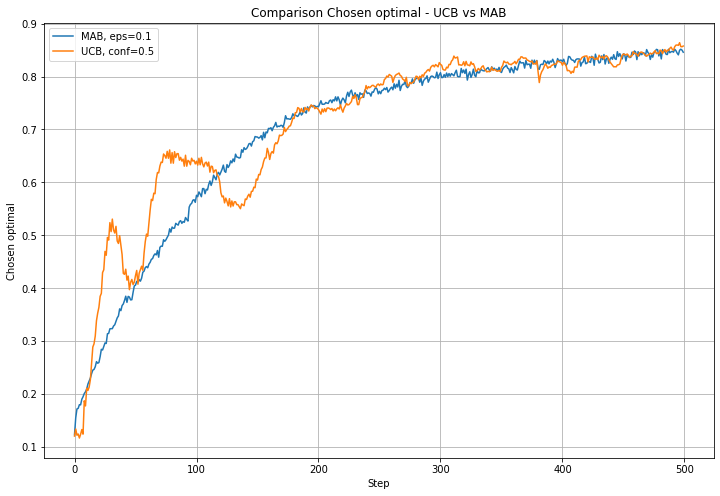

In [54]:
column = 'chosen_optimal'
best_epsilon = bern_results_naive_1[naive_argmax]['epsilon'].iloc[0]
best_conf = ucb_bern_results[ucb_bern_argmax]['conf'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_1[naive_argmax][column], label=f"MAB, eps={best_epsilon}")
plt.plot(ucb_bern_results[ucb_bern_argmax][column], label=f"UCB, conf={best_conf}")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - UCB vs MAB")
plt.show()

### Average reward

In [55]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in bern_results_naive_1]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_1[naive_argmax]['epsilon'].iloc[0]}")

Naive Approach	 Best epsilon - 0.1


In [56]:
## find the best conf
ucb_mean_choices = [item['reward'].mean() for item in ucb_bern_results]
ucb_bern_argmax = np.argmax(ucb_mean_choices)

print(f"UCB\t Best conf - {ucb_bern_results[ucb_bern_argmax]['conf'].iloc[0]}")

UCB	 Best conf - 0.5


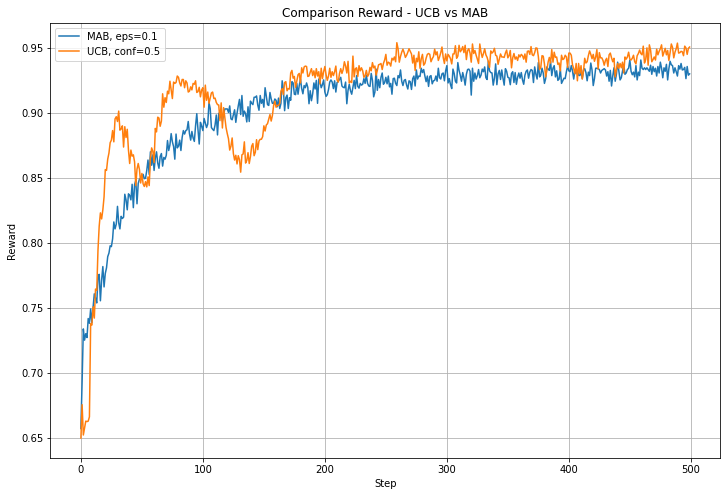

In [57]:
column = 'reward'
best_epsilon = gaus_results_naive_half[naive_argmax]['epsilon'].iloc[0]
best_conf = ucb_bern_results[ucb_bern_argmax]['conf'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_1[naive_argmax][column], label=f"MAB, eps={best_epsilon}")
plt.plot(ucb_bern_results[ucb_bern_argmax][column], label=f"UCB, conf={best_conf}")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - UCB vs MAB")
plt.show()

## UCB vs Naive - Gaussian

### Optimal action %

In [58]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in gaus_results_naive_1]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_1[naive_argmax]['epsilon'].iloc[0]}")

Naive Approach	 Best epsilon - 0.1


In [59]:
## find the best conf
ucb_mean_choices = [item['chosen_optimal'].mean() for item in ucb_gaus_results]
ucb_gaus_argmax = np.argmax(ucb_mean_choices)

print(f"UCB\t Best conf - {ucb_gaus_results[ucb_gaus_argmax]['conf'].iloc[0]}")

UCB	 Best conf - 0.5


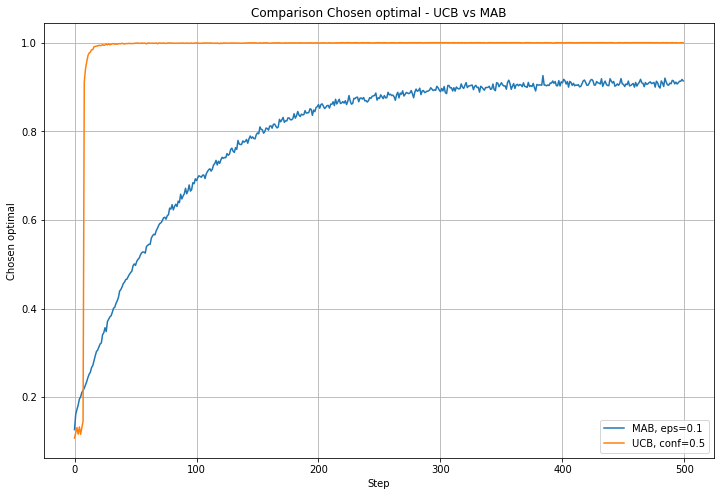

In [60]:
column = 'chosen_optimal'
best_epsilon = gaus_results_naive_1[naive_argmax]['epsilon'].iloc[0]
best_conf = ucb_gaus_results[ucb_gaus_argmax]['conf'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_1[naive_argmax][column], label=f"MAB, eps={best_epsilon}")
plt.plot(ucb_gaus_results[ucb_gaus_argmax][column], label=f"UCB, conf={best_conf}")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - UCB vs MAB")
plt.show()

### Average reward

In [61]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in gaus_results_naive_1]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_1[naive_argmax]['epsilon'].iloc[0]}")

Naive Approach	 Best epsilon - 0.1


In [62]:
## find the best conf
ucb_mean_choices = [item['reward'].mean() for item in ucb_gaus_results]
ucb_gaus_argmax = np.argmax(ucb_mean_choices)

print(f"UCB\t Best conf - {ucb_gaus_results[ucb_gaus_argmax]['conf'].iloc[0]}")

UCB	 Best conf - 0.5


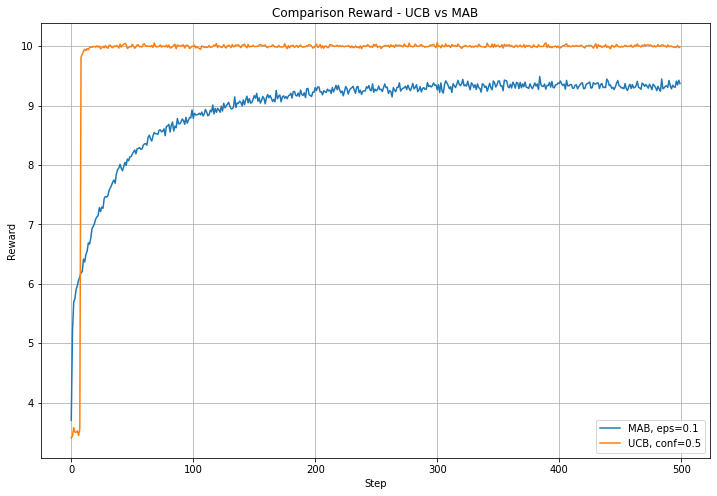

In [63]:
column = 'reward'
best_epsilon = gaus_results_naive_1[naive_argmax]['epsilon'].iloc[0]
best_conf = ucb_gaus_results[ucb_gaus_argmax]['conf'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_1[naive_argmax][column], label=f"MAB, eps={best_epsilon}")
plt.plot(ucb_gaus_results[ucb_gaus_argmax][column], label=f"UCB, conf={best_conf}")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - UCB vs MAB")
plt.show()